# Aplicação de modelo de regressão linear multipla para prever total de alugueis de casas em São Paulo. 

Objetivo deste trabalho está em prever valores de aluguéis utilizando uma regressão linear multipla. Para isso precisamos executar três "grandes" passos abaixo:
- 1 - Limpeza e tratamento de dados;
- 2 - Avaliar as variáveis que tem forte correlação com Y(total) e que não são colineares;
- 3 - Aplicar o Modelo e verificar resultados.

In [2]:
#Vamos importar as bibliotecas abaixo
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
import seaborn as srn

In [3]:
#Importando o dataset e entendendo a "planilha"
casas = pd.read_csv('houses_to_rent.csv')
casas.head()

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"


No **primeiro passo**, precisamos tratar e limpar os dados do arquivo a fim do modelo estatístico rodar corretamente. Segue abaixo breve descrição das etapas do processo:
- Análise geral;
- Exclusão de Features que não servem para este trabalho;
- Checar NaN Values;
- Analisar formato das features;


In [4]:
casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      6080 non-null   int64 
 1   city            6080 non-null   int64 
 2   area            6080 non-null   int64 
 3   rooms           6080 non-null   int64 
 4   bathroom        6080 non-null   int64 
 5   parking spaces  6080 non-null   int64 
 6   floor           6080 non-null   object
 7   animal          6080 non-null   object
 8   furniture       6080 non-null   object
 9   hoa             6080 non-null   object
 10  rent amount     6080 non-null   object
 11  property tax    6080 non-null   object
 12  fire insurance  6080 non-null   object
 13  total           6080 non-null   object
dtypes: int64(6), object(8)
memory usage: 665.1+ KB


In [5]:
#Tamanho dos dados;
casas.shape

(6080, 14)

In [6]:
#Checando dados duplicados;
casas[casas.duplicated(['Unnamed: 0'],keep=False)]

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total


In [7]:
#Verificando quantidade de casas por Cidade;
city = casas.groupby(['city']).size()
city

city
0     831
1    5249
dtype: int64

In [8]:
#Conforme demonstrado acima, a amostragem de casas em Campinas é pequena comparada com São Paulo. Considerando que Campinas é uma Cidade Grande (passa 1 milhão hab). logo não acho interessante trabalhar com as casas de Campinas. Vamos prosseguir somente com casas de São Paulo;
saopaulo = casas[casas['city']==1]
casas_atualizada = saopaulo

In [9]:
#A quantidade amostral de São Paulo está boa.
casas_atualizada

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
2,2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"
5,5,1,13,1,1,0,2,acept,not furnished,R$0,"R$2,200",R$42,R$28,"R$2,270"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6073,6073,1,88,2,2,1,1,acept,not furnished,"R$1,200","R$6,000",R$0,R$77,"R$7,277"
6075,6075,1,50,2,1,1,2,acept,not furnished,R$420,"R$1,150",R$0,R$15,"R$1,585"
6076,6076,1,84,2,2,1,16,not acept,furnished,R$768,"R$2,900",R$63,R$37,"R$3,768"
6078,6078,1,160,3,2,2,-,not acept,not furnished,R$0,"R$3,500",R$250,R$53,"R$3,803"


In [10]:
# Retirando colunas que não são necessárias para nosso modelo (Unnamed e city)
cs = casas_atualizada.drop(['Unnamed: 0', 'city'], axis=1)
cs.head()

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
2,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"
5,13,1,1,0,2,acept,not furnished,R$0,"R$2,200",R$42,R$28,"R$2,270"


In [11]:
#Checando por NaN Values. Neste caso está tudo certo.
cs.isnull().sum()

area              0
rooms             0
bathroom          0
parking spaces    0
floor             0
animal            0
furniture         0
hoa               0
rent amount       0
property tax      0
fire insurance    0
total             0
dtype: int64

In [12]:
cs.dtypes
#Abaixo temos um caso onde várias feaures estão em formato "object" (que é praticamente uma string). Para que possamos aplicar regressão linear, precisamos tornar algumas features como variáveis numéricas. As variáveis são: 'hoa','rent amount', 'property tax', 'fire insurance', 'total'.

area               int64
rooms              int64
bathroom           int64
parking spaces     int64
floor             object
animal            object
furniture         object
hoa               object
rent amount       object
property tax      object
fire insurance    object
total             object
dtype: object

In [13]:
cs['hoa'].value_counts()

R$0         1168
Sem info     109
Incluso       74
R$1,000       71
R$1,100       63
            ... 
R$828          1
R$703          1
R$1,659        1
R$3,490        1
R$774          1
Name: hoa, Length: 1198, dtype: int64

In [14]:
cs['property tax'].value_counts()

R$0        976
R$84        72
R$250       69
R$50        65
R$100       62
          ... 
R$1,172      1
R$277        1
R$4,234      1
R$2,173      1
R$1,335      1
Name: property tax, Length: 1012, dtype: int64

In [15]:
# As features hoa e proerty tax contém campos tipo string ('sem info' e 'incluso'). É necessário alterá-los para um número.
# No caso do "sem info", poderia alterar para a mediana, porém não compensa o trabalho, vou alterar esse e o 'Incluso' para 0.
cs['hoa'] = cs['hoa'].replace('Incluso','0')
cs['hoa'] = cs['hoa'].replace('Sem info','0')

In [16]:
cs['property tax'] = cs['property tax'].replace('Incluso','0')

In [17]:
#Vamos chegar se foram substituidas
cs['hoa'].value_counts()

R$0        1168
0           183
R$1,000      71
R$1,100      63
R$1,200      62
           ... 
R$828         1
R$703         1
R$1,659       1
R$3,490       1
R$774         1
Name: hoa, Length: 1197, dtype: int64

In [18]:
cs['property tax'].value_counts()
#Ambos estão ok

R$0        976
R$84        72
R$250       69
R$50        65
R$100       62
          ... 
R$1,172      1
R$4,234      1
R$277        1
R$2,173      1
R$1,335      1
Name: property tax, Length: 1012, dtype: int64

In [19]:
#vamos checar os tipos gerais novamente:
cs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5249 entries, 0 to 6079
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   area            5249 non-null   int64 
 1   rooms           5249 non-null   int64 
 2   bathroom        5249 non-null   int64 
 3   parking spaces  5249 non-null   int64 
 4   floor           5249 non-null   object
 5   animal          5249 non-null   object
 6   furniture       5249 non-null   object
 7   hoa             5249 non-null   object
 8   rent amount     5249 non-null   object
 9   property tax    5249 non-null   object
 10  fire insurance  5249 non-null   object
 11  total           5249 non-null   object
dtypes: int64(4), object(8)
memory usage: 533.1+ KB


In [20]:
#Vemos que ainda muitos estão com dtype object. Precisamos limpar os sinais "R$"" e "," e converter para float.
def extract_value_from(Value):
    out = Value.replace('R$', '')
    out_ = out.replace(',', '')
    out_ = float(out_)
    return out_

In [21]:
cs['hoa'] = cs['hoa'].apply(lambda x: extract_value_from(x))
cs['rent amount'] = cs['rent amount'].apply(lambda x: extract_value_from(x))
cs['property tax'] = cs['property tax'].apply(lambda x: extract_value_from(x))
cs['fire insurance'] = cs['fire insurance'].apply(lambda x: extract_value_from(x))
cs['total'] = cs['total'].apply(lambda x: extract_value_from(x))

In [22]:
cs.info()
# Ao checar dtypes, confirmamos a alteração.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5249 entries, 0 to 6079
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area            5249 non-null   int64  
 1   rooms           5249 non-null   int64  
 2   bathroom        5249 non-null   int64  
 3   parking spaces  5249 non-null   int64  
 4   floor           5249 non-null   object 
 5   animal          5249 non-null   object 
 6   furniture       5249 non-null   object 
 7   hoa             5249 non-null   float64
 8   rent amount     5249 non-null   float64
 9   property tax    5249 non-null   float64
 10  fire insurance  5249 non-null   float64
 11  total           5249 non-null   float64
dtypes: float64(5), int64(4), object(3)
memory usage: 533.1+ KB


In [23]:
# Agora temos um caso especial: A feature "floor" contém quase 30% das linhas preenchidas com valor "-". Nesse caso entendemos que o andar não foi informado. Primeiro preciso verificar se essa variável tem forte correlação com o total.
cs['floor'].value_counts()

-     1350
1      484
3      316
2      307
5      270
6      265
8      258
4      257
7      242
9      194
10     191
11     171
12     163
13     130
14     130
15      94
16      76
18      66
17      66
19      45
20      34
21      30
23      26
25      23
22      21
24      11
27       7
28       6
26       6
29       4
68       1
32       1
35       1
85       1
99       1
31       1
Name: floor, dtype: int64

In [24]:
cs['floor'] = cs['floor'].replace(['-','301'], 0).astype(int)
cs['floor'].value_counts()

0     1350
1      484
3      316
2      307
5      270
6      265
8      258
4      257
7      242
9      194
10     191
11     171
12     163
14     130
13     130
15      94
16      76
18      66
17      66
19      45
20      34
21      30
23      26
25      23
22      21
24      11
27       7
26       6
28       6
29       4
32       1
68       1
35       1
85       1
31       1
99       1
Name: floor, dtype: int64

In [25]:
cs['total'].corr(cs['floor'])
#Confirmado que as features "floor" e "total" tem correlação desprezível, logo podemos excluir também essa feature.

0.09113653346417706

In [26]:
csa = cs.drop(['floor'], axis=1)
csa.head()

,area,rooms,bathroom,parking spaces,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,240,3,3,4,acept,furnished,0.0,8000.0,1000.0,121.0,9121.0
2,443,5,5,4,acept,furnished,4172.0,7000.0,1417.0,89.0,12680.0
3,73,2,2,1,acept,not furnished,700.0,1250.0,150.0,16.0,2116.0
4,19,1,1,0,not acept,not furnished,0.0,1200.0,41.0,16.0,1257.0
5,13,1,1,0,acept,not furnished,0.0,2200.0,42.0,28.0,2270.0


Primeiro grande passo foi finalizado.

No segundo passo, vamos analisar quais variáveis independentes tem maior relação com a variável Y(total) que pretendemos prever. Novamente uma breve descrição das etapas:

- Transformar categóricas em indicadores para o modelo
- Analisar em gráficos todas as variáveis independentes em comparação com a total para encontrar as de correlação forte;
- separar todas essas para 



In [27]:
#Transformando em binários as variáveis "animal" e "furniture". Em 'animal' acept = 1 e not acept = 0. Em furniture furnished = 1 e not furnished = 0
csa.loc[csa['animal'] ==  'acept', 'animal'] = 1
csa.loc[csa['animal'] ==  'not acept', 'animal'] = 0
csa['animal'].value_counts()

1    3999
0    1250
Name: animal, dtype: int64

In [28]:
csa.loc[csa['furniture'] ==  'furnished', 'furniture'] = 1
csa.loc[csa['furniture'] ==  'not furnished', 'furniture'] = 0
csa['furniture'].value_counts()

0    3785
1    1464
Name: furniture, dtype: int64

In [29]:
# Agora vamos verificar os outliers de todas as features numéricas:
csa.describe()
# Verificando se a média e mediana estão muito longe.

,area,rooms,bathroom,parking spaces,hoa,rent amount,property tax,fire insurance,total
count,5249.000000,5249.000000,5249.000000,5249.000000,5249.000000,5249.000000,5249.000000,5249.000000,5249.000000
mean,152.295866,2.508478,2.392646,1.776148,1156.889503,4695.003429,542.958659,61.978472,6457.271099
std,361.395933,1.135106,1.438378,1.622886,4272.344334,3638.731872,6684.302035,50.210127,9274.163738
min,10.000000,1.000000,1.000000,0.000000,0.000000,600.000000,0.000000,4.000000,660.000000
25%,58.000000,2.000000,1.000000,1.000000,0.000000,2000.000000,30.000000,26.000000,2666.000000
50%,101.000000,3.000000,2.000000,1.000000,700.000000,3413.000000,167.000000,45.000000,4545.000000
75%,200.000000,3.000000,3.000000,3.000000,1550.000000,6300.000000,500.000000,83.000000,8652.000000
max,24606.000000,10.000000,10.000000,12.000000,220000.000000,45000.000000,366300.000000,677.000000,372700.000000


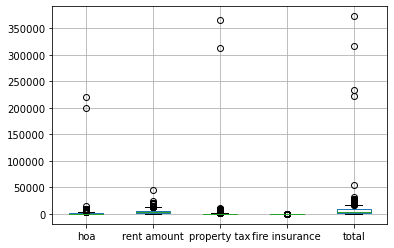

In [30]:
csa.boxplot(column=['hoa', 'rent amount', 'property tax', 'fire insurance', 'total'])
plt.show() 

In [31]:
#As features Total, hoa, rent amount e Property Tax contém outliers. Vamos excluir e checar novamente
rows = csa[csa['total']>20000].index
csa.drop(rows, inplace=True)
rows1 = csa[csa['rent amount']>15000].index
csa.drop(rows1, inplace=True)
rows2 = csa[csa['property tax']>4000].index
csa.drop(rows2, inplace=True)
rows3 = csa[csa['hoa']>5000].index
csa.drop(rows3, inplace=True)

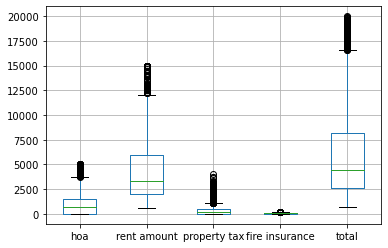

In [32]:
csa.boxplot(column=['hoa', 'rent amount', 'property tax', 'fire insurance', 'total'])
plt.show()

#Por mais que tenham outliers aqui, creio não ser interessante nesse caso remover mais senão diminui significativamente o numero de amostras.

In [33]:
csa.shape

(5118, 11)

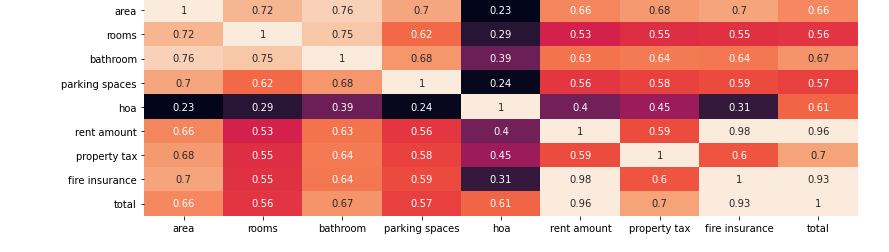

In [34]:
# Correlações fortes/moderadas com o total = Area, Bathroom,Rent Amount,Property tax, Fire Insurance
corrmat = csa.corr()
f, ax = plt.subplots(figsize=(16, 4))
sns.heatmap(corrmat, vmax=.8, annot=True);

In [35]:
y = csa['total']
x1 = csa['area']
x2 = csa['bathroom'] 
x3 = csa['rent amount'] 
x4 = csa['property tax']
x5 = csa['fire insurance']

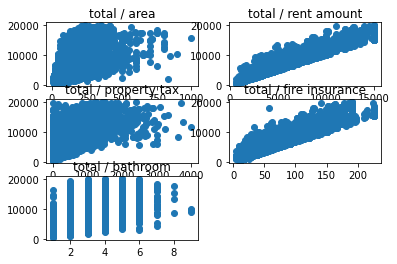

In [36]:
# Analisando mais a fundo as correlações

plt.figure(1)
plt.rcParams['figure.figsize'] = (15,10)
plt.subplot(321)
plt.scatter(x1,y)
plt.title('total / area')

plt.subplot(322)
plt.scatter(x3,y)
plt.title('total / rent amount')

plt.subplot(323)
plt.scatter(x4,y)
plt.title('total / property tax')

plt.subplot(324)
plt.scatter(x5,y)
plt.title('total / fire insurance')

plt.subplot(325)
plt.scatter(x2,y)
plt.title('total / bathroom')

plt.show()

In [37]:
csa.head()

,area,rooms,bathroom,parking spaces,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,240,3,3,4,1,1,0.0,8000.0,1000.0,121.0,9121.0
2,443,5,5,4,1,1,4172.0,7000.0,1417.0,89.0,12680.0
3,73,2,2,1,1,0,700.0,1250.0,150.0,16.0,2116.0
4,19,1,1,0,0,0,0.0,1200.0,41.0,16.0,1257.0
5,13,1,1,0,1,0,0.0,2200.0,42.0,28.0,2270.0


In [38]:
#Agora aplicando o modelo Linear Regression do Sickit Learn, e assim finalizo o projeto com bom resultado.

x10 = csa.iloc[:, [0,1,2,3,6,7,8,9]].values
y10 = csa.iloc[:, 10].values

In [39]:
from sklearn.model_selection import train_test_split
x10_treinamento, x10_teste, y10_treinamento, y10_teste = train_test_split(x10, y10, test_size = 0.3, random_state = 0) 

In [47]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x10_treinamento, y10_treinamento)
score = regressor.score(x10_teste, y10_teste)
score

0.9999928440945567

In [45]:
previsoes = regressor.predict(x10_teste)


In [46]:
from sklearn.metrics import mean_squared_error
mae = mean_squared_error(y10_teste, previsoes)
mae

130.15588811356943

In [43]:
regressor.intercept_

0.2966937954461173

In [44]:
regressor.coef_

array([-5.03705392e-05, -1.42642883e-01,  1.58422919e-01,  1.39636288e-01,
        9.99662425e-01,  1.00090074e+00,  9.99738761e-01,  9.35752431e-01])